# UAC20 Audio Class Descriptors 列舉

### 需安裝

```
pip install pyusb

```

### Windows DLL
[libusb-win32-devel-filter-1.2.6.0.exe](https://sourceforge.net/projects/libusb-win32/files/libusb-win32-releases/1.2.6.0/)  

https://sourceforge.net/projects/libusb-win32/  



### Linux 權限
https://ubuntuforums.org/showthread.php?t=1682084  
https://linuxconfig.org/tutorial-on-how-to-write-basic-udev-rules-in-linux  
```
If anyone is interested.. fixed with udev rule:

cd /etc/udev/rules.d/

nano 70-ch341.rules

SUBSYSTEM=="usb", ATTRS{idVendor}=="1a86", GROUP="dialout"
SUBSYSTEM=="usb", ATTRS{idVendor}=="1a86", MODE="666"

then reloaded udev rules:

$ sudo udevadm control --reload-rules  
$ sudo udevadm trigger

```

In [1]:
%pylab inline  

Populating the interactive namespace from numpy and matplotlib


In [2]:
import os
import sys
sys.path.append(os.path.abspath(os.path.join('..', 'codes')))

path = os.sep.join(['..', '..', '..', '..', '..', '待處理', 'Universal Serial Bus', 'bitbucket', 'github', 'codes'])
sys.path.append(path) 

path = os.sep.join(['..', '..', '..', '..', '..', '待處理', 'ORM', 'bitbucket', 'github', 'codes'])
sys.path.append(path) 
 
import universal_serial_bus
from universal_serial_bus import *
from universal_serial_bus.orm import ModelBuilder
from usb_audio.orm.uac20 import UACdevice

## USB Descriptors

In [3]:
from universal_serial_bus.orm.usb20.descriptors import * 

db_path = 'C:\\Users\\Wei\\Dropbox\\Coding\\notebooks\\專案\\待處理\\Universal Serial Bus\\bitbucket\\github\\spec\\usb20\\'
db_path = db_path + 'usb_2_0_descriptors.sqlite'
db_url = 'sqlite:///' + db_path  

ModelBuilder._truncate_tables(db_url) 
_, _, tables, session_usb_descriptors = map_db_objects(db_url)

## USB Codes

In [4]:
from universal_serial_bus.orm.usb20.codes import * 

db_path = 'C:\\Users\\Wei\\Dropbox\\Coding\\notebooks\\專案\\待處理\\Universal Serial Bus\\bitbucket\\github\\spec\\usb20\\'
db_path = db_path + 'usb_2_0_codes.sqlite'
db_url = 'sqlite:///' + db_path  

# ModelBuilder._truncate_tables(db_url) 
_, _, tables, session_usb_codes = map_db_objects(db_url)

## UAC Descriptors

In [5]:
from usb_audio.orm.uac20.descriptors import *

db_path = 'C:\\Users\\Wei\\Dropbox\\Coding\\notebooks\\專案\\待處理\\USB Audio\\bitbucket\\github\\spec\\uac20\\'
db_path = db_path + 'uac_2_0_descriptors.sqlite'
db_url = 'sqlite:///' + db_path 

ModelBuilder._truncate_tables(db_url)
_, _, tables, session_uac_descriptors = map_db_objects(db_url)

In [6]:
# ModelBuilder.gen_all(db_url, True)

## UAC Codes

In [7]:
from usb_audio.orm.uac20.codes import *

db_path = 'C:\\Users\\Wei\\Dropbox\\Coding\\notebooks\\專案\\待處理\\USB Audio\\bitbucket\\github\\spec\\uac20\\'
db_path = db_path + 'uac_2_0_codes.sqlite'
db_url = 'sqlite:///' + db_path 

_, _, tables, session_uac_codes = map_db_objects(db_url)

In [8]:
# ModelBuilder.gen_all(db_url, True)

## UAC Format Type Descriptors

In [9]:
from usb_audio.orm.uac20.formats.descriptors import *

db_path = 'C:\\Users\\Wei\\Dropbox\\Coding\\notebooks\\專案\\待處理\\USB Audio\\bitbucket\\github\\spec\\uac20\\'
db_path = db_path + 'uac_2_0_data_formats_descriptors.sqlite'
db_url = 'sqlite:///' + db_path 

ModelBuilder._truncate_tables(db_url)
_, _, tables, session_uac_format_descriptors = map_db_objects(db_url)

In [10]:
# ModelBuilder.gen_all(db_url, True)

## UAC Format Types

In [11]:
from usb_audio.orm.uac20.formats.formats import *

db_path = 'C:\\Users\\Wei\\Dropbox\\Coding\\notebooks\\專案\\待處理\\USB Audio\\bitbucket\\github\\spec\\uac20\\'
db_path = db_path + 'uac_2_0_data_formats.sqlite'
db_url = 'sqlite:///' + db_path 

_, _, tables, session_uac_formats = map_db_objects(db_url)

In [12]:
# ModelBuilder.gen_all(db_url, True)

## UAC Terminal Types

In [13]:
from usb_audio.orm.uac20.terminals import *

db_path = 'C:\\Users\\Wei\\Dropbox\\Coding\\notebooks\\專案\\待處理\\USB Audio\\bitbucket\\github\\spec\\uac20\\'
db_path = db_path + 'uac_2_0_terminal_types.sqlite'
db_url = 'sqlite:///' + db_path 

_, _, tables, session_uac_terminal_types = map_db_objects(db_url)

In [14]:
# ModelBuilder.gen_all(db_url, True)

## Device

In [15]:
idVendor = 0x1b3f
idProduct = 0x2008

usb_device = UACdevice(vid = idVendor, pid = idProduct)
usb_device.id = 1
# print(dev)

## Device descriptor
https://www.beyondlogic.org/usbnutshell/usb5.shtml#DeviceDescriptors  

In [16]:
bmRequestType = usb.util.build_request_type(CONTROL_REQUEST.DIRECTION.IN, 
                                            CONTROL_REQUEST.TYPE.STANDARD, 
                                            CONTROL_REQUEST.RECIPIENT.DEVICE)

In [17]:
descriptor = usb_device.ctrl_transfer(bmRequestType = bmRequestType, 
                                      bRequest = CONTROL_REQUEST.GET_DESCRIPTOR, 
                                      wValue = DESCRIPTOR.TYPE.DEVICE << 8, 
                                      wIndex = 0, 
                                      data_or_wLength = DESCRIPTOR.SIZE.DEVICE)
descriptor

array('B', [18, 1, 16, 1, 0, 0, 0, 8, 63, 27, 8, 32, 0, 1, 1, 2, 0, 1])

In [18]:
dev_dscrpt = StandardDeviceDescriptor.from_byte_array(descriptor, parent_id = usb_device.id)
session_usb_descriptors.add(dev_dscrpt)
session_usb_descriptors.commit()
dev_dscrpt.id

1

## Configuration descriptor
https://www.beyondlogic.org/usbnutshell/usb5.shtml#ConfigurationDescriptors  

In [19]:
descriptor = usb_device.ctrl_transfer(bmRequestType = bmRequestType, 
                                      bRequest = CONTROL_REQUEST.GET_DESCRIPTOR, 
                                      wValue = DESCRIPTOR.TYPE.CONFIG << 8, 
                                      wIndex = 0, 
                                      data_or_wLength = DESCRIPTOR.SIZE.CONFIG)
descriptor

array('B', [9, 2, 253, 0, 4, 1, 0, 128, 50])

In [20]:
# config = StandardConfigurationDescriptor(*(StandardConfigurationDescriptor.get_descriptor_fields_values(descriptor)))
config_dscrpt = StandardConfigurationDescriptor.from_byte_array(descriptor, parent_id = dev_dscrpt.id)
session_usb_descriptors.add(config_dscrpt)
session_usb_descriptors.commit()
config_dscrpt.id

1

### Host 再一次發送 GetDescriptor(Config類) 的請求
完整的長度 = wTotalLength

In [21]:
descriptor = usb_device.ctrl_transfer(bmRequestType = bmRequestType, 
                                      bRequest = CONTROL_REQUEST.GET_DESCRIPTOR, 
                                      wValue = DESCRIPTOR.TYPE.CONFIG << 8, 
                                      wIndex = 0, 
                                      data_or_wLength = descriptor[2])
descriptor

array('B', [9, 2, 253, 0, 4, 1, 0, 128, 50, 9, 4, 0, 0, 0, 1, 1, 0, 0, 10, 36, 1, 0, 1, 100, 0, 2, 1, 2, 12, 36, 2, 1, 1, 1, 0, 2, 3, 0, 0, 0, 12, 36, 2, 4, 1, 2, 0, 1, 1, 0, 0, 0, 9, 36, 3, 3, 1, 3, 0, 6, 0, 9, 36, 3, 2, 1, 1, 0, 9, 0, 7, 36, 5, 9, 1, 5, 0, 10, 36, 6, 6, 8, 1, 1, 2, 2, 0, 9, 36, 6, 5, 4, 1, 67, 0, 0, 9, 36, 6, 7, 4, 1, 3, 0, 0, 13, 36, 4, 8, 2, 1, 7, 2, 3, 0, 0, 0, 0, 9, 4, 1, 0, 0, 1, 2, 0, 0, 9, 4, 1, 1, 1, 1, 2, 0, 0, 7, 36, 1, 1, 1, 1, 0, 14, 36, 2, 1, 2, 2, 16, 2, 68, 172, 0, 128, 187, 0, 9, 5, 5, 1, 192, 0, 1, 0, 0, 7, 37, 1, 1, 0, 0, 0, 9, 4, 2, 0, 0, 1, 2, 0, 0, 9, 4, 2, 1, 1, 1, 2, 0, 0, 7, 36, 1, 2, 1, 1, 0, 14, 36, 2, 1, 1, 2, 16, 2, 68, 172, 0, 128, 187, 0, 9, 5, 134, 1, 100, 0, 1, 0, 0, 7, 37, 1, 1, 0, 0, 0, 9, 4, 3, 0, 1, 3, 0, 0, 0, 9, 33, 1, 2, 0, 1, 34, 41, 0, 7, 5, 131, 3, 8, 0, 32])

In [22]:
OrmClassBase.concate_byte_arrays(usb_device.descriptors_dbos)

array('B', [9, 2, 253, 0, 4, 1, 0, 128, 50, 9, 4, 0, 0, 0, 1, 1, 0, 0, 10, 36, 1, 0, 1, 100, 0, 2, 1, 12, 36, 2, 1, 1, 1, 0, 2, 3, 0, 0, 0, 12, 36, 2, 4, 1, 2, 0, 1, 1, 0, 0, 0, 9, 36, 3, 3, 1, 3, 0, 6, 0, 9, 36, 3, 2, 1, 1, 0, 9, 0, 7, 36, 5, 9, 1, 5, 0, 10, 36, 6, 6, 8, 1, 1, 2, 2, 0, 9, 36, 6, 5, 4, 1, 67, 0, 0, 9, 36, 6, 7, 4, 1, 3, 0, 0, 13, 36, 4, 8, 2, 1, 7, 2, 3, 0, 0, 0, 0, 9, 4, 1, 0, 0, 1, 2, 0, 0, 9, 4, 1, 1, 1, 1, 2, 0, 0, 7, 36, 1, 1, 1, 1, 0, 14, 36, 2, 1, 2, 2, 9, 5, 5, 1, 192, 0, 1, 7, 37, 1, 1, 0, 0, 0, 9, 4, 2, 0, 0, 1, 2, 0, 0, 9, 4, 2, 1, 1, 1, 2, 0, 0, 7, 36, 1, 2, 1, 1, 0, 14, 36, 2, 1, 1, 2, 9, 5, 134, 1, 100, 0, 1, 7, 37, 1, 1, 0, 0, 0, 9, 4, 3, 0, 1, 3, 0, 0, 0, 7, 5, 131, 3, 8, 0, 32])

## 所有的 descriptors

In [23]:
descriptors = list(StandardConfigurationDescriptor.split_descriptor(descriptor))
descriptors

[array('B', [9, 2, 253, 0, 4, 1, 0, 128, 50]),
 array('B', [9, 4, 0, 0, 0, 1, 1, 0, 0]),
 array('B', [10, 36, 1, 0, 1, 100, 0, 2, 1, 2]),
 array('B', [12, 36, 2, 1, 1, 1, 0, 2, 3, 0, 0, 0]),
 array('B', [12, 36, 2, 4, 1, 2, 0, 1, 1, 0, 0, 0]),
 array('B', [9, 36, 3, 3, 1, 3, 0, 6, 0]),
 array('B', [9, 36, 3, 2, 1, 1, 0, 9, 0]),
 array('B', [7, 36, 5, 9, 1, 5, 0]),
 array('B', [10, 36, 6, 6, 8, 1, 1, 2, 2, 0]),
 array('B', [9, 36, 6, 5, 4, 1, 67, 0, 0]),
 array('B', [9, 36, 6, 7, 4, 1, 3, 0, 0]),
 array('B', [13, 36, 4, 8, 2, 1, 7, 2, 3, 0, 0, 0, 0]),
 array('B', [9, 4, 1, 0, 0, 1, 2, 0, 0]),
 array('B', [9, 4, 1, 1, 1, 1, 2, 0, 0]),
 array('B', [7, 36, 1, 1, 1, 1, 0]),
 array('B', [14, 36, 2, 1, 2, 2, 16, 2, 68, 172, 0, 128, 187, 0]),
 array('B', [9, 5, 5, 1, 192, 0, 1, 0, 0]),
 array('B', [7, 37, 1, 1, 0, 0, 0]),
 array('B', [9, 4, 2, 0, 0, 1, 2, 0, 0]),
 array('B', [9, 4, 2, 1, 1, 1, 2, 0, 0]),
 array('B', [7, 36, 1, 2, 1, 1, 0]),
 array('B', [14, 36, 2, 1, 1, 2, 16, 2, 68, 172, 0, 1

## 判斷 descriptors 的種類，並儲存到 db

In [24]:
def is_a(descpt, i, code):
    return OrmClassBase.int_eq_hex(descpt[i], code)

 
def get_descriptor_class(dscrpt, intf_type = None): 
    _class = None
    session = None
         
    if is_a(dscrpt, 1, '02'):  # 如果是 config
        _class = StandardConfigurationDescriptor  
        session = session_usb_descriptors    
     
    if is_a(dscrpt, 1, '05'):  # 如果是 endpoint
        if intf_type == "HID":
            _class = StandardEndpointDescriptor
            session = session_usb_descriptors 
        
        if intf_type == "AS":
            _class = StandardAsIsochronousAudioDataEndpointDescriptor
            session = session_uac_descriptors

    if is_a(dscrpt, 1, '04'):  # 如果是 interface
        
        _class = StandardInterfaceDescriptor      
        session = session_usb_descriptors    
        
        if is_a(dscrpt, 5, '03'):  # 如果是 audio
            intf_type =  "HID" 
                
        if is_a(dscrpt, 5, '01'):  # 如果是 audio
            if is_a(dscrpt, 6, '01'):  # 如果是 AC interface
                intf_type =  "AC" 
            if is_a(dscrpt, 6, '02'):  # 如果是 AC interface
                intf_type =  "AS" 
                        
    if is_a(dscrpt, 1, '24'):  # 如果是 CS_INTERFACE
        session = session_uac_descriptors
        if intf_type == "AC":             
            _classes = {'00': None,
                        '01': ClassSpecificAcInterfaceHeaderDescriptor,
                        '02': InputTerminalDescriptor,
                        '03': OutputTerminalDescriptor,
                        '04': MixerUnitDescriptor,
                        '05': SelectorUnitDescriptor,
                        '06': FeatureUnitDescriptor,
                        '07': 'EFFECT_UNIT',
                        '08': 'PROCESSING_UNIT',
                        '09': ExtensionUnitDescriptor,
                        '0A': ClockSourceDescriptor,
                        '0B': ClockSelectorDescriptor,
                        '0C': ClockMultiplierDescriptor,
                        '0D': SamplingRateConverterUnitDescriptor}
            
            code = OrmClassBase.int_to_hex(dscrpt[2])
            _class = _classes[code]            
            
        if intf_type == "AS":
             
            _classes = {'00': None,
                        '01': ClassSpecificAsInterfaceDescriptor,
                        '02': TypeIFormatTypeDescriptor,
                        '03': EncoderDescriptor,
                        '04': 'DECODER'}
            
            code = OrmClassBase.int_to_hex(dscrpt[2])
            _class = _classes[code]            
            if code == '02': session = session_uac_format_descriptors

                        
    if is_a(dscrpt, 1, '25'):  # 如果是 CS_ENDPOINT
        session = session_uac_descriptors
        if intf_type == "AC":  
            pass    
            
        if intf_type == "AS":             
            _classes = {'00': None,
                        '01': ClassSpecificAsIsochronousAudioDataEndpointDescriptor}
            
            code = OrmClassBase.int_to_hex(dscrpt[2])
            _class = _classes[code]
            if code == '02': session = session_uac_format_descriptors
                
    return _class, session, intf_type 

In [25]:
intf_type = None
i = 0

dbos = []

for descriptor in descriptors:
    _class, session, intf_type = get_descriptor_class(descriptor, intf_type)
    
    print()
    print(i)
    i+=1    
    
    print(_class, intf_type)
    print(descriptor)

    
    if _class is not None:
        dbo = _class.from_byte_array(descriptor)
        dbos.append(dbo)
        print(dbo.byte_array)
        session.add(dbo)
        session.commit()


0
<class 'universal_serial_bus.orm.usb20.descriptors.StandardConfigurationDescriptor'> None
array('B', [9, 2, 253, 0, 4, 1, 0, 128, 50])
array('B', [9, 2, 253, 0, 4, 1, 0, 128, 50])

1
<class 'universal_serial_bus.orm.usb20.descriptors.StandardInterfaceDescriptor'> AC
array('B', [9, 4, 0, 0, 0, 1, 1, 0, 0])
array('B', [9, 4, 0, 0, 0, 1, 1, 0, 0])

2
<class 'usb_audio.orm.uac20.descriptors.ClassSpecificAcInterfaceHeaderDescriptor'> AC
array('B', [10, 36, 1, 0, 1, 100, 0, 2, 1, 2])
array('B', [10, 36, 1, 0, 1, 100, 0, 2, 1])

3
<class 'usb_audio.orm.uac20.descriptors.InputTerminalDescriptor'> AC
array('B', [12, 36, 2, 1, 1, 1, 0, 2, 3, 0, 0, 0])
array('B', [12, 36, 2, 1, 1, 1, 0, 2, 3, 0, 0, 0])

4
<class 'usb_audio.orm.uac20.descriptors.InputTerminalDescriptor'> AC
array('B', [12, 36, 2, 4, 1, 2, 0, 1, 1, 0, 0, 0])
array('B', [12, 36, 2, 4, 1, 2, 0, 1, 1, 0, 0, 0])

5
<class 'usb_audio.orm.uac20.descriptors.OutputTerminalDescriptor'> AC
array('B', [9, 36, 3, 3, 1, 3, 0, 6, 0])
array('B

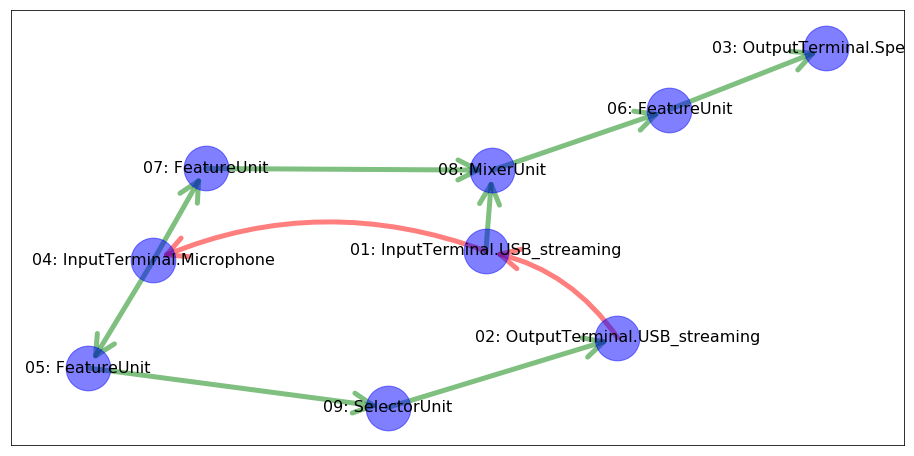

In [26]:
plt.figure(figsize = (16, 8))

usb_device.draw_topolograph()

## 各種 codes

In [27]:
descriptor_types = DescriptorType.to_dict('bDescriptorType', 'dscrpt_type', session_usb_codes)
descriptor_types

{'01': 'device',
 '02': 'configuration',
 '03': 'string',
 '04': 'interface',
 '05': 'endpoint',
 '06': 'device_qualifier',
 '07': 'other_speed_configuration',
 '08': 'interface_power',
 '09': 'OTG',
 '0a': 'debug',
 '0b': 'interface_association'}

In [28]:
class_codes = ClassCode.to_dict('base_code', 'description', session_usb_codes)
class_codes

{'00': 'Use class information in the Interface Descriptors',
 '01': 'Audio',
 '02': 'Communications and CDC Control',
 '03': 'HID (Human Interface Device)',
 '05': 'Physical',
 '06': 'Image',
 '07': 'Printer',
 '08': 'Mass Storage',
 '09': 'Hub',
 '0a': 'CDC-Data',
 '0b': 'Smart Card',
 '0d': 'Content Security',
 '0e': 'Video',
 '0f': 'Personal Healthcare',
 '10': 'Audio/Video Devices',
 '11': 'Billboard Device Class',
 '12': 'USB Type-C Bridge Class',
 'dc': 'Diagnostic Device',
 'e0': 'Wireless Controller',
 'ef': 'Miscellaneous',
 'fe': 'Application Specific',
 'ff': 'Vendor Specific'}

In [29]:
uac_subclasses = AudioInterfaceSubclassCode.to_dict('value', 'audio_interface_subclass_code', session_uac_codes)
uac_subclasses

{'00': 'INTERFACE_SUBCLASS_UNDEFINED',
 '01': 'AUDIOCONTROL',
 '02': 'AUDIOSTREAMING',
 '03': 'MIDISTREAMING'}

In [30]:
ac_descriptor_types = AudioClassSpecificDescriptorType.to_dict('value', 'descriptor_type', session_uac_codes)
ac_descriptor_types

{'20': 'CS_UNDEFINED',
 '21': 'CS_DEVICE',
 '22': 'CS_CONFIGURATION',
 '23': 'CS_STRING',
 '24': 'CS_INTERFACE',
 '25': 'CS_ENDPOINT'}

In [31]:
ac_descriptor_subtypes = AudioClassSpecificAcInterfaceDescriptorSubtype.to_dict('value', 'descriptor_subtype', session_uac_codes)
ac_descriptor_subtypes

{'00': 'AC_DESCRIPTOR_UNDEFINED',
 '01': 'HEADER',
 '02': 'INPUT_TERMINAL',
 '03': 'OUTPUT_TERMINAL',
 '04': 'MIXER_UNIT',
 '05': 'SELECTOR_UNIT',
 '06': 'FEATURE_UNIT',
 '07': 'EFFECT_UNIT',
 '08': 'PROCESSING_UNIT',
 '09': 'EXTENSION_UNIT',
 '0A': 'CLOCK_SOURCE',
 '0B': 'CLOCK_SELECTOR',
 '0C': 'CLOCK_MULTIPLIER',
 '0D': 'SAMPLE_RATE_CONVERTER'}

In [32]:
as_descriptor_subtypes = \
    AudioClassSpecificAsInterfaceDescriptorSubtype.to_dict('value', 'descriptor_subtype', session_uac_codes)
as_descriptor_subtypes

{'00': 'AS_DESCRIPTOR_UNDEFINED',
 '01': 'AS_GENERAL',
 '02': 'FORMAT_TYPE',
 '03': 'ENCODER',
 '04': 'DECODER'}

In [33]:
ep_descriptor_subtypes = \
    AudioClassSpecificEndpointDescriptorSubtype.to_dict('value', 'descriptor_subtype', session_uac_codes)
ep_descriptor_subtypes

{'00': 'DESCRIPTOR_UNDEFINED', '01': 'EP_GENERAL'}

## String descriptor
https://www.beyondlogic.org/usbnutshell/usb5.shtml#StringDescriptors  

In [34]:
string_descriptors = usb_device.get_strings()
string_descriptors

['', 'GeneralPlus', 'USB Audio Device']

In [35]:
for i in range(len(string_descriptors)): 
        if string_descriptors[i] is not None:
            string = UnicodeStringDescriptor(len(string_descriptors[i]),
                                             UnicodeStringDescriptor.int_to_hex(3), 
                                             string_descriptors[i], parent_id = usb_device.id)   
            session_usb_descriptors.add(string)
        
session_usb_descriptors.commit() 